<a href="https://colab.research.google.com/github/Idostri/CNN/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch, torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch import nn

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

training_dataset = datasets.MNIST(root ='./data', train= True, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(dataset= training_dataset, batch_size=100, shuffle=True)

In [ ]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
print(images.shape[:])


torch.Size([100, 1, 28, 28])


In [ ]:
class Lenet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fulc1 = nn.Linear(50*4*4, 500)
    self.dropout = nn.Dropout(0.5)
    self.fulc2 = nn.Linear(500, 10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fulc1(x))
    x = self.dropout(x)
    x = self.fulc2(x)
    return x
    





In [ ]:
model = Lenet().to(device)
model



Lenet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fulc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fulc2): Linear(in_features=500, out_features=10, bias=True)
)

In [ ]:
crertation = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

epochs = 15
loss_history = []

In [ ]:
for i in range(epochs):
  running_loss = 0.0
  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = crertation(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    epoch_loss = running_loss/len(training_loader)
    loss_history.append(epoch_loss)
    print('training loss: {:.4f}.'.format(epoch_loss))

training loss: 0.6148.
training loss: 0.1643.
training loss: 0.1051.
training loss: 0.0806.
training loss: 0.0656.
training loss: 0.0578.
training loss: 0.0504.
training loss: 0.0457.
training loss: 0.0398.
training loss: 0.0368.
training loss: 0.0346.
training loss: 0.0318.
training loss: 0.0297.
training loss: 0.0265.
training loss: 0.0251.


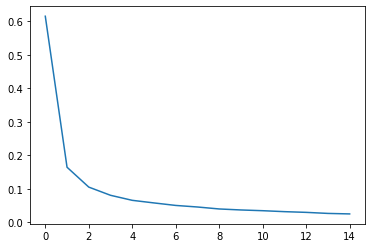

In [ ]:
plt.plot(loss_history)